In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel('Key CBK.xlsx')
df.describe()

,Mean,Buy,Sell
count,2820.000000,2820.000000,2820.000000
mean,94.711332,94.613220,94.809548
std,9.354355,9.351033,9.357813
min,75.361900,75.261100,75.462800
25%,86.010200,85.911550,86.114600
50%,100.312500,100.212500,100.412500
75%,102.316625,102.216700,102.415875
max,111.591200,111.491200,111.691200


In [4]:
type(df['Date'])

pandas.core.series.Series

<IPython.core.display.Javascript object>


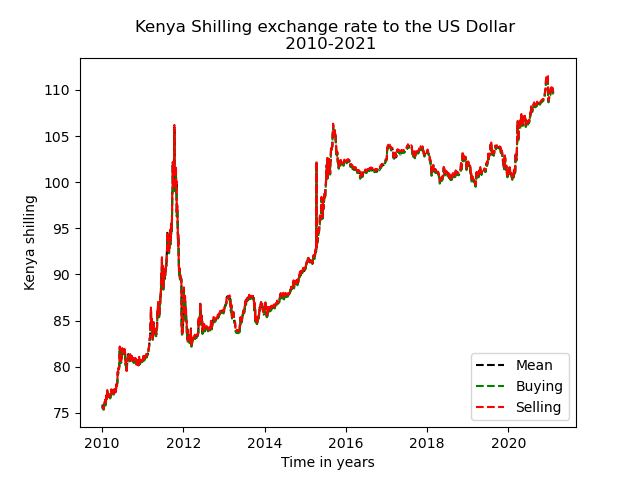

In [5]:
plt.figure()
plt.plot(df['Date'], df['Mean'], '--',color='black', label='Mean')
plt.plot(df['Date'], df['Buy'], '--', color='green', label='Buying')
plt.plot(df['Date'], df['Sell'], '--', color='red', label='Selling')
plt.xlabel('Time in years')
plt.ylabel('Kenya shilling')
plt.title('Kenya Shilling exchange rate to the US Dollar \n 2010-2021')
plt.legend()

In [6]:
#we want to get the frequency of our data based on our selected bins
firstcount=0
secondcount=0
thirdcount=0
fourthcount=0
fifthcount = 0
sixthcount=0
seventhcount=0

for i in df['Buy']:
     if int(i) in range(80,85):
        firstcount+=1
for i in df['Buy']:
     if int(i) in range(85,90):
        secondcount+=1        
for i in df['Buy']:
     if int(i) in range(90,95):
        thirdcount+=1   
for i in df['Buy']:
     if int(i) in range(95,100):
        fourthcount+=1        
for i in df['Buy']:
     if int(i) in range(100,105):
        fifthcount+=1
for i in df['Buy']:
     if int(i) in range(105,110):
        sixthcount+=1        
for i in df['Buy']:
     if int(i) in range(110,115):
        seventhcount+=1        
total = seventhcount+firstcount+secondcount+thirdcount+fourthcount+fifthcount+sixthcount
total

2707

<IPython.core.display.Javascript object>


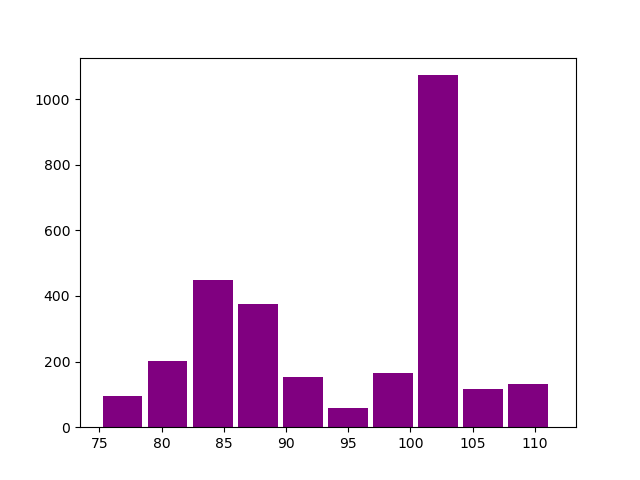

In [7]:
plt.figure()
plt.hist(df['Buy'], width=3.2, bins=10, color='purple')#plot our hitogram by passing our column and the spacing of the bins, can also input bins as a single intger and matplotlib will divide the distribution into the number of bins we passed
#for example if we pass bins as a single value 10, matplotlib will divide our distribution into 10 equal parts
#plt.hist(df['Sell'], width=2.3, bins= [82.5,87.5,90,95,100,105,110,115], color='green')
#plt.text(86.2,secondcount+30, s=secondcount, color='black')#we can label our histogram by num of frequncy just to make it easier to the decoder to undrstand
plt.show()

In [8]:
df['month'] = df['Date'].dt.month#we create a new column called month that takes the value of our month from the date timestamp
df['day'] = df['Date'].dt.day#we create a new column called day that takes in the value of the day from the date timestamp
df['year'] = df['Date'].dt.year#we create a new column called year that takes in the value of the year from the date timestamp
# note that the column from which we create our new columns date and month from has to be type timestamp.
#we now group our data based on two columns, year and month,
#we have to pass in our columnns as a list and in order
#we then get the average mean price per month using the .aggregate function.
#note that numpy will get your aggregate uing the last row you indexed on thats why the order of indexing i very important
df = df.groupby(['year','month']).agg({'Mean':np.average})
df

Mean
year month            
2010 1       75.786195
     2       76.730495
     3       76.946752
     4       77.254365
     5       78.541400
...                ...
2020 10     108.638181
     11     109.252057
     12     110.593559
2021 1      109.830080
     2      109.898500

[134 rows x 1 columns]

<IPython.core.display.Javascript object>


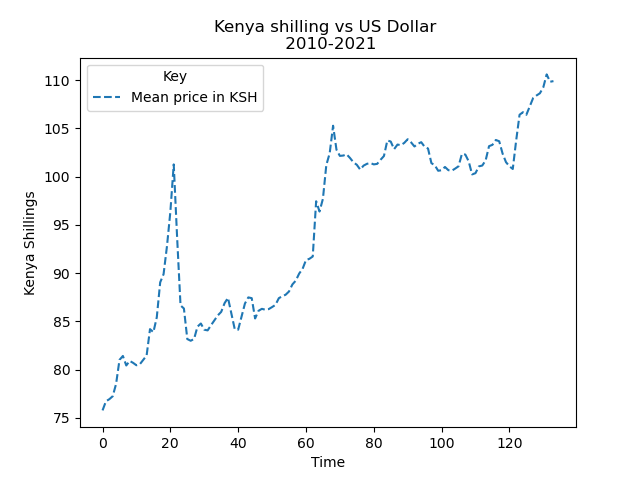

In [9]:
df = df.reset_index()
plt.figure()
plt.plot(df['Mean'], '--', label='Mean price in KSH')
plt.xlabel('Time')
plt.ylabel('Kenya Shillings')
plt.title('Kenya shilling vs US Dollar \n 2010-2021')
plt.legend(title='Key')

In [10]:
df=df.reset_index()
#we reset our index because matplotlib cannot plot multi-indexed data

<IPython.core.display.Javascript object>


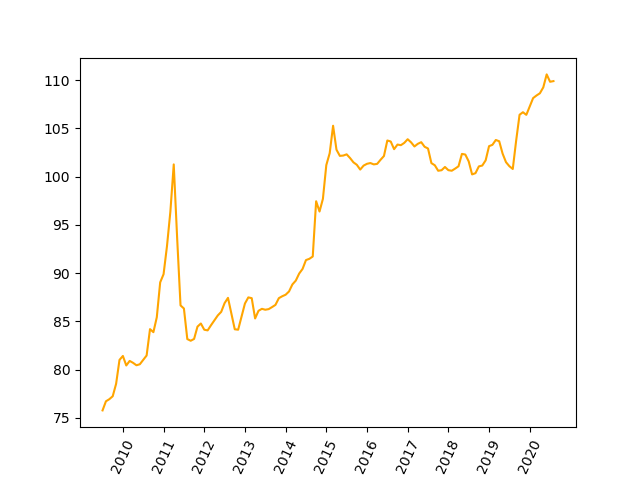

In [11]:
plt.figure()
plt.plot(df['Mean'], color = 'orange' )
plt.xticks([6,  18,  30,  42,  54,  66,  78,  90, 102, 114, 126],['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'],rotation=65)
#we label our x-axis since we did reset our index and matplotlib will only label our x-axis by index
plt.show()

<IPython.core.display.Javascript object>


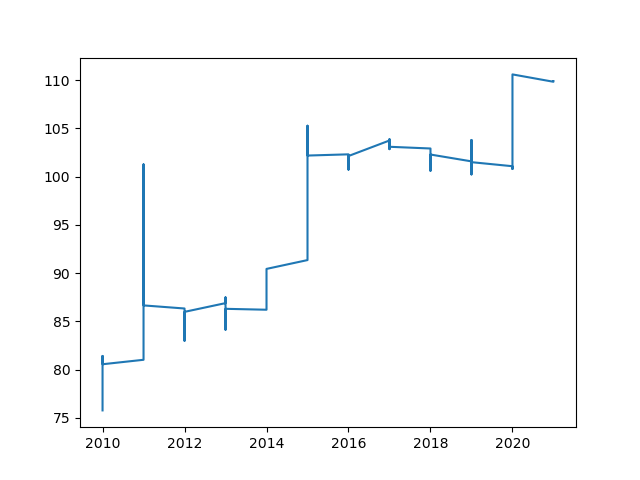

In [12]:
plt.figure()
df= df.set_index('year')
plt.plot(df['Mean'])
plt.show()#the reason for our graph is that it plots all 2010 data in a single line thus is misrepresentative
#it does not follow alberto cairos principle of truthfulness and insightfulnes

In [13]:
df

,index,month,Mean
year,,,
2010,0,1,75.786195
2010,1,2,76.730495
2010,2,3,76.946752
2010,3,4,77.254365
2010,4,5,78.541400
...,...,...,...
2020,129,10,108.638181
2020,130,11,109.252057
2020,131,12,110.593559
